In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='3'
import tensorflow as tf

In [10]:
model = tf.keras.models.load_model("./Models/tf_model")

In [11]:
data = pd.read_csv('../Data/LT_DU_data_for_ML.csv')

In [12]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe
  #df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value.to_numpy()[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [13]:
start = 1
length = 20000

In [14]:
batch_size = 256
data_for_prediction = df_to_dataset(data.iloc[start:start+length],  shuffle=False, batch_size=batch_size)
data_for_prediction

<PrefetchDataset element_spec=({'nace': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'esize_class': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'gender': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'age_class': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'lpk': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'education': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'experience': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [15]:
predict = model.predict(data_for_prediction)


79/79 [==============================] - 0s 1ms/step


In [16]:
from sklearn.metrics import r2_score
print('Test: R2=', r2_score(data.target.iloc[start:start+length].to_numpy(), predict.ravel()).round(3))

Test: R2= 0.629


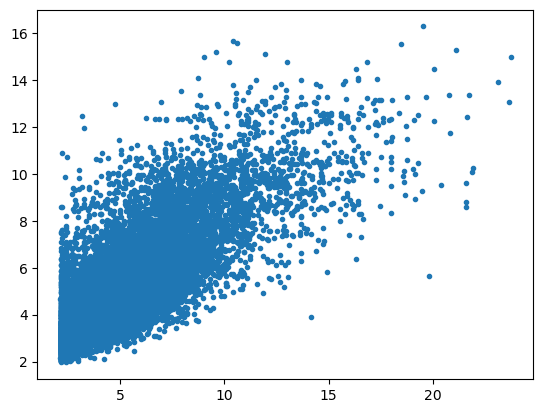

In [17]:
plt.plot(data.target.iloc[start:start+length].to_numpy(), predict.ravel(), ".");

In [18]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
import joblib
xgb_model1 = joblib.load('./Models/XGBoost_model.joblib')

In [20]:
y_pred = xgb_model1.predict(data)

print('Train: RMSE=', np.sqrt(mean_squared_error(data.target, y_pred)).round(3),
    ' R2=', r2_score(data.target, y_pred).round(3))

Train: RMSE= 1.472  R2= 0.665


In [21]:
data.iloc[1:5]

,nace,esize_class,gender,age_class,lpk,education,experience,target
1,C,1_49,F,40-49,p334,G2,0,2.51
2,M,50_249,F,40-49,p522,G2,18,2.19
3,M,50_249,F,40-49,p522,G2,12,2.19
4,M,50_249,F,14-29,p522,G2,0,2.19


In [22]:
xgb_model1.predict(data.iloc[1:5])

array([3.1477158, 3.3394225, 3.2218292, 3.014258 ], dtype=float32)

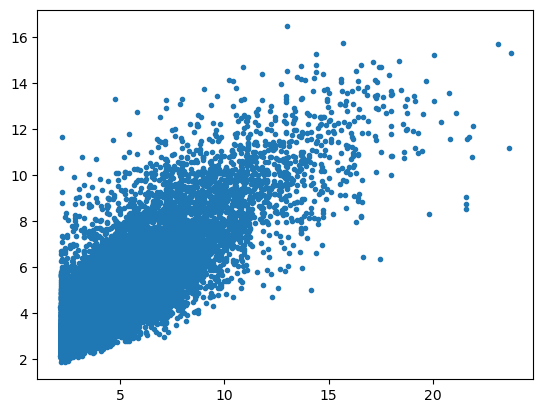

In [23]:
plt.plot( data.iloc[1:20000].target, xgb_model1.predict(data.iloc[1:20000]), ".");

In [24]:
data.head()

,nace,esize_class,gender,age_class,lpk,education,experience,target
0,C,1_49,M,40-49,p721,G2,13,8.20
1,C,1_49,F,40-49,p334,G2,0,2.51
2,M,50_249,F,40-49,p522,G2,18,2.19
3,M,50_249,F,40-49,p522,G2,12,2.19
4,M,50_249,F,14-29,p522,G2,0,2.19
